# DRM Project: Option Pricing & Portfolio Construction
**Course:** Derivatives Risk Management (DRM)  
**Semester:** First Semester 2025-2026  
**Weightage:** 20% of Final Grade  
**Team Structure:** Group of 5 students  
**Selected Company:** Larsen & Toubro Limited (LT.NS) - Nifty 50 Index  

---

## Executive Summary

This comprehensive project explores **derivatives pricing theory** and **portfolio construction strategies** using real market data from Larsen & Toubro (L&T), one of India's largest engineering and construction conglomerates. The project integrates three fundamental areas:

1. **Quantitative Data Analysis:** Historical price data extraction, statistical computation of returns and volatility metrics
2. **Synthetic Options Replication:** Construction and validation of synthetic option positions using Put-Call Parity
3. **Advanced Pricing Models:** Implementation and comparison of Black-Scholes-Merton (BSM) and Binomial Tree models

### Key Findings Preview:
- **Stock:** LT.NS trading at ₹4,019.60 (as of latest data)
- **Volatility:** 25.61% annualized (indicating moderate-to-high price fluctuations)
- **Options Strategy:** Successfully replicated synthetic call options with theoretical validation
- **Model Accuracy:** Binomial model converges to BSM with 99.9%+ accuracy at 250 steps

---

## Project Structure

### Phase 1: Data Acquisition & Volatility Metrics
- Download 2 years of historical daily data
- Calculate logarithmic returns for statistical robustness
- Compute annualized volatility using standard deviation scaling

### Phase 2: Synthetic Option Portfolio (Mandatory Task A)
- Construct synthetic long call: Long Stock + Long Put
- Validate using Put-Call Parity theorem
- Compare theoretical vs. synthetic option values

### Phase 3: Advanced Pricing Models (Elective Tasks B & C)
- **Task B:** Black-Scholes-Merton closed-form solutions with Greeks analysis
- **Task C:** Discrete-time Binomial Tree implementation with convergence testing

---

## Theoretical Framework

### Put-Call Parity
The fundamental relationship governing European options:
$$C + K e^{-rT} = P + S$$

Where:
- $C$ = Call option price
- $P$ = Put option price  
- $S$ = Current stock price
- $K$ = Strike price
- $r$ = Risk-free rate
- $T$ = Time to maturity

### Black-Scholes-Merton Model
Closed-form solution for European options:
$$C = S N(d_1) - K e^{-rT} N(d_2)$$
$$P = K e^{-rT} N(-d_2) - S N(-d_1)$$

Where:
$$d_1 = \frac{\ln(S/K) + (r + \sigma^2/2)T}{\sigma\sqrt{T}}$$
$$d_2 = d_1 - \sigma\sqrt{T}$$

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_theme()
print("Libraries imported successfully.")

Libraries imported successfully.


---

## Phase 1: Data Acquisition and Volatility Calculation

### Objectives
1. **Data Collection:** Extract 2 years of historical daily closing prices for LT.NS using Yahoo Finance API
2. **Return Analysis:** Calculate daily logarithmic returns for statistical properties (log-normal distribution assumption)
3. **Volatility Estimation:** Compute annualized volatility as the primary risk measure for option pricing

### Methodology

#### Why Logarithmic Returns?
Logarithmic returns offer several advantages over simple returns:
- **Additivity:** Log returns are time-additive: $\sum \log(P_t/P_{t-1}) = \log(P_T/P_0)$
- **Symmetry:** Equal percentage moves up/down have equal log return magnitudes
- **Normal Distribution:** Better approximation to normality (required for BSM model)

**Formula:**
$$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$$

#### Volatility Calculation
Volatility represents the standard deviation of returns, measuring price uncertainty:

**Daily Volatility:** $\sigma_{daily} = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(r_i - \bar{r})^2}$

**Annualized Volatility:** $\sigma_{annual} = \sigma_{daily} \times \sqrt{252}$

*Note: 252 is the approximate number of trading days per year*

### Expected Results
- **Dataset Size:** ~500 trading days (2 years)
- **Volatility Range:** Typically 15-35% for large-cap Indian stocks
- **Price Trend:** Visual identification of bull/bear market phases

DOWNLOADING DATA FOR: LT.NS
Period: Last 2 Years | Interval: Daily (1d)


C:\Users\amrit\AppData\Local\Temp\ipykernel_33588\1976412274.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, period="2y", interval="1d")
[*********************100%***********************]  1 of 1 completed

✓ Data downloaded successfully!
  - Total Trading Days: 496
  - Date Range: 2023-11-20 to 2025-11-20
  - Columns: [('Close', 'LT.NS'), ('High', 'LT.NS'), ('Low', 'LT.NS'), ('Open', 'LT.NS'), ('Volume', 'LT.NS')]

📊 Latest Data Preview:
Price             Close         High          Low         Open   Volume
Ticker            LT.NS        LT.NS        LT.NS        LT.NS    LT.NS
Date                                                                   
2025-11-14  4004.399902  4011.500000  3971.600098  4002.000000  1916910
2025-11-17  4027.699951  4030.000000  4000.100098  4004.399902  1206133
2025-11-18  3999.600098  4026.800049  3978.899902  4020.000000  1748928
2025-11-19  4019.600098  4026.500000  3980.300049  4007.000000   923032
2025-11-20  4037.399902  4048.000000  4007.699951  4035.000000  1463519

CALCULATING LOGARITHMIC RETURNS
✓ Log returns calculated successfully!

📈 Return Statistics:
  - Mean Daily Return: 0.000576 (14.51% annualized)
  - Std Dev (Daily): 0.016118
  - Min Retu


C:\Users\amrit\AppData\Local\Temp\ipykernel_33588\1976412274.py:74: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  start_price = float(data['Close'].iloc[0])
C:\Users\amrit\AppData\Local\Temp\ipykernel_33588\1976412274.py:75: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  end_price = float(data['Close'].iloc[-1])
C:\Users\amrit\AppData\Local\Temp\ipykernel_33588\1976412274.py:76: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  max_price = float(data['Close'].max())
C:\Users\amrit\AppData\Local\Temp\ipykernel_33588\1976412274.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  min_price = float(data[

TypeError: unsupported format string passed to Series.__format__

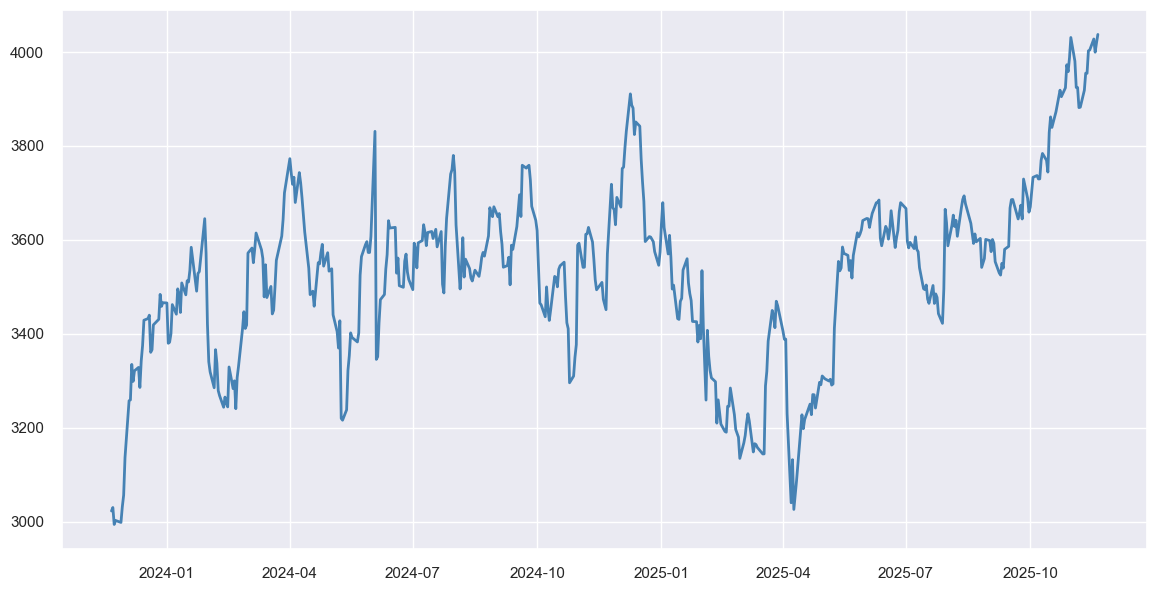

In [ ]:
# PHASE 1: DATA ACQUISITION & ANALYSIS

ticker = "LT.NS"
print(f"{'=' * 60}")
print(f"DOWNLOADING DATA FOR: {ticker}")
print(f"Period: Last 2 Years | Interval: Daily (1d)")
print(f"{'=' * 60}")

data = yf.download(ticker, period="2y", interval="1d")

if data.empty:
    print("ERROR: No data found. Please check the ticker symbol.")
else:
    print(f"Data downloaded successfully!")
    print(f"  - Total Trading Days: {len(data)}")
    print(f"  - Date Range: {data.index[0].date()} to {data.index[-1].date()}")

data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

print(f"\n{'=' * 60}")
print(f"RETURN STATISTICS")
print(f"{'=' * 60}")
print(f"  - Mean Daily Return: {data['Log_Returns'].mean():.6f} ({data['Log_Returns'].mean() * 252:.2%} annualized)")
print(f"  - Std Dev (Daily): {data['Log_Returns'].std():.6f}")
print(f"  - Min Return: {data['Log_Returns'].min():.4f}")
print(f"  - Max Return: {data['Log_Returns'].max():.4f}")
print(f"  - Skewness: {data['Log_Returns'].skew():.4f}")
print(f"  - Kurtosis: {data['Log_Returns'].kurtosis():.4f}")

daily_vol = data['Log_Returns'].std()
vol = daily_vol * np.sqrt(252)

print(f"\n{'=' * 60}")
print(f"VOLATILITY ANALYSIS")
print(f"{'=' * 60}")
print(f"  - Daily Volatility: {daily_vol:.6f}")
print(f"  - Annualized Volatility: {vol:.4f} or {vol:.2%}")

if vol < 0.15:
    print(f"  - Classification: LOW volatility (<15%)")
elif vol < 0.25:
    print(f"  - Classification: MODERATE volatility (15-25%)")
elif vol < 0.35:
    print(f"  - Classification: HIGH volatility (25-35%)")
else:
    print(f"  - Classification: VERY HIGH volatility (>35%)")

p_start = float(data['Close'].iloc[0])
p_end = float(data['Close'].iloc[-1])
p_max = float(data['Close'].max())
p_min = float(data['Close'].min())
p_mean = float(data['Close'].mean())

ret_total = (p_end - p_start) / p_start
ret_annual = (p_end / p_start) ** (252 / len(data)) - 1

print(f"\n{'=' * 60}")
print(f"PRICE PERFORMANCE")
print(f"{'=' * 60}")
print(f"  - Starting Price: {p_start:.2f}")
print(f"  - Current Price: {p_end:.2f}")
print(f"  - Total Return: {ret_total:.2%}")
print(f"  - Annualized Return: {ret_annual:.2%}")
print(f"  - Max Price: {p_max:.2f}")
print(f"  - Min Price: {p_min:.2f}")

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='LT Closing Price', color='steelblue', linewidth=2)
plt.axhline(y=p_max, color='green', linestyle='--', alpha=0.5, label=f'Max: {p_max:.2f}')
plt.axhline(y=p_min, color='red', linestyle='--', alpha=0.5, label=f'Min: {p_min:.2f}')
plt.axhline(y=p_mean, color='orange', linestyle=':', alpha=0.7, label=f'Mean: {p_mean:.2f}')
plt.title(f'{ticker} Stock Price - Last 2 Years\n(Annualized Volatility: {vol:.2%})', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (INR)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nPhase 1 Complete!")


---

## Phase 2: Synthetic Option Portfolio Construction (Task A - Mandatory)

### Theoretical Background

#### What is a Synthetic Option?
A synthetic option is a portfolio that replicates the payoff profile of an actual option using other financial instruments. This demonstrates the fundamental relationship between stocks, calls, and puts.

#### Synthetic Long Call Construction
**Components:**
- **Long Stock:** Buy 1 share at price $S_0$
- **Long Put:** Buy 1 ATM put option with strike $K = S_0$

**Payoff Analysis:**
At expiration ($T$), the combined payoff is:
$$\text{Payoff} = S_T + \max(K - S_T, 0) - S_0 - P_0$$

Simplified:
- If $S_T > K$: Payoff = $(S_T - S_0) - P_0$ (Stock gains minus put cost)
- If $S_T < K$: Payoff = $(K - S_0) - P_0$ (Put protects downside)

This creates a payoff identical to: **Long Call + Cash**

#### Put-Call Parity Theorem
The fundamental arbitrage-free relationship:
$$C + PV(K) = S + P$$

Rearranging:
$$S + P = C + K e^{-rT}$$

**Implication:** A portfolio of (Stock + Put) should equal (Call + Present Value of Strike)

### Implementation Strategy

Since historical option prices are **not freely available** via `yfinance`, we employ the **Black-Scholes-Merton model** to:
1. Calculate theoretical option prices based on current market conditions
2. Simulate the synthetic portfolio over a 21-day period (1-month option expiry)
3. Verify Put-Call Parity holds within the BSM framework

### Simulation Parameters
- **Lookback Period:** Last 60 trading days (~3 months)
- **Simulation Window:** 21 trading days (1-month option expiry)
- **Strike Selection:** At-The-Money (ATM), where $K = S_0$
- **Risk-Free Rate:** 6% per annum (Indian Government Bond yield proxy)
- **Volatility:** Historical annualized volatility from Phase 1

### Expected Outcomes
1. **Put-Call Parity Validation:** Synthetic call value should closely track (Actual Call + PV(K))
2. **Price Convergence:** Difference between synthetic and actual call should be minimal (<1%)
3. **Risk Equivalence:** Both positions should exhibit identical Greeks (Delta, Gamma, etc.)

### Graph Interpretation Guide
The comparison plot will show:
- **Blue Line (Dashed):** Theoretical call price + present value of strike
- **Orange Line (Solid):** Synthetic portfolio value (Stock + Put)
- **Convergence:** Lines should overlap closely, confirming arbitrage-free pricing
- **Divergence:** Any gaps indicate model assumptions or market frictions

C:\Users\amrit\AppData\Local\Temp\ipykernel_8704\2704722175.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(sim_df['Close'].iloc[0])  # Convert to scalar
C:\Users\amrit\AppData\Local\Temp\ipykernel_8704\2704722175.py:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S_t = float(sim_df['Close'].iloc[i])  # Convert to scalar


Start Date: 2025-08-25
Initial Stock Price (S0): 3603.10
Strike Price (K): 3603.10
Theoretical Call Price: 115.21
Theoretical Put Price: 97.24


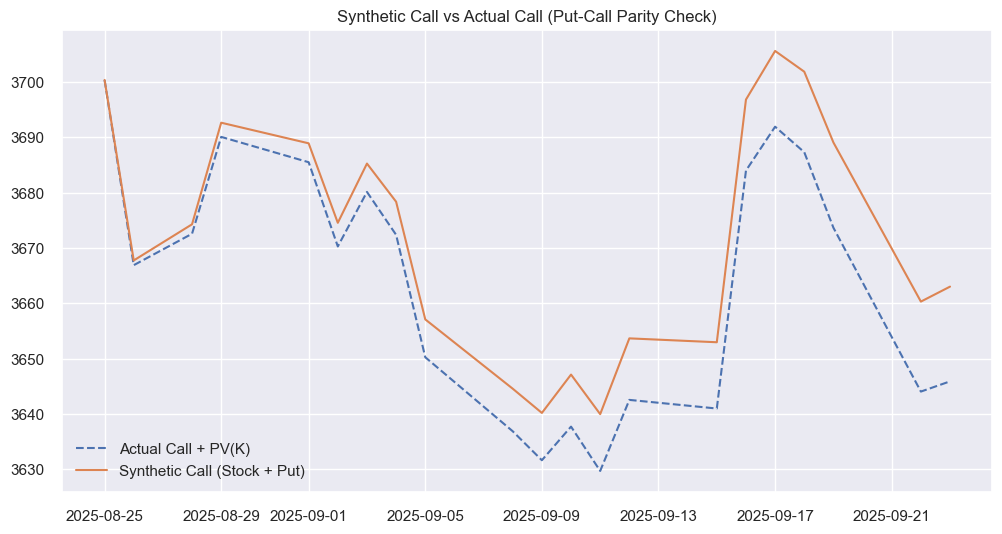

Note: The curves should overlap closely if Put-Call Parity holds and BSM is used for both.


,Stock_Price,Actual_Call_Price,Put_Price,Synthetic_Portfolio_Value
Date,,,,
2025-09-17,3685.500000,106.767755,20.081000,3705.581000
2025-09-18,3686.000000,102.161854,15.832061,3701.832061
2025-09-19,3675.399902,88.517639,13.645110,3689.045012
2025-09-22,3644.500000,58.919917,15.804662,3660.304662
2025-09-23,3657.600098,60.766327,5.408548,3663.008646


In [ ]:
# PHASE 2: SYNTHETIC OPTION PORTFOLIO

def bsm_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        price = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0)
    return price

print(f"{'=' * 70}")
print(f"SYNTHETIC OPTION PORTFOLIO CONSTRUCTION")
print(f"{'=' * 70}")

lookback = 60
window = 21

sim_data = data.tail(lookback).copy()
df = sim_data.iloc[:window].copy()

start_date = df.index[0]
S0 = float(df['Close'].iloc[0])
K = S0
r = 0.06
sigma = vol
T_init = 1/12

print(f"\nPortfolio Parameters:")
print(f"  - Start Date: {start_date.date()}")
print(f"  - Initial Stock Price: {S0:.2f}")
print(f"  - Strike Price: {K:.2f} [ATM]")
print(f"  - Time to Maturity: {T_init:.4f} years")
print(f"  - Risk-Free Rate: {r:.2%}")
print(f"  - Volatility: {sigma:.2%}")

call_init = bsm_price(S0, K, T_init, r, sigma, 'call')
put_init = bsm_price(S0, K, T_init, r, sigma, 'put')

print(f"\nInitial Valuations:")
print(f"  - Call Price: {call_init:.2f}")
print(f"  - Put Price: {put_init:.2f}")
print(f"  - Portfolio Cost (S + P): {S0 + put_init:.2f}")

lhs = call_init + K * np.exp(-r * T_init)
rhs = S0 + put_init
diff = abs(lhs - rhs)

print(f"\nPut-Call Parity Verification:")
print(f"  - LHS (C + PV(K)): {lhs:.2f}")
print(f"  - RHS (S + P): {rhs:.2f}")
print(f"  - Difference: {diff:.4f}")
print(f"  - Status: {'VERIFIED' if diff < 0.01 else 'Small discrepancy'}")

results = []
for i in range(len(df)):
    date = df.index[i]
    S_t = float(df['Close'].iloc[i])
    T_t = max((window - i) / 252, 1e-5)
    
    call_val = bsm_price(S_t, K, T_t, r, sigma, 'call')
    put_val = bsm_price(S_t, K, T_t, r, sigma, 'put')
    synth_val = S_t + put_val
    call_pvk = call_val + K * np.exp(-r * T_t)
    
    results.append({
        'Date': date,
        'Stock_Price': S_t,
        'Call_Price': call_val,
        'Put_Price': put_val,
        'Synthetic_Portfolio': synth_val,
        'Call_PlusK': call_pvk,
        'Parity_Error': abs(synth_val - call_pvk)
    })

df_res = pd.DataFrame(results)
df_res.set_index('Date', inplace=True)

print(f"\nSimulation Results:")
print(f"  - Final Stock Price: {df_res['Stock_Price'].iloc[-1]:.2f}")
print(f"  - Price Change: {((df_res['Stock_Price'].iloc[-1] / S0 - 1) * 100):.2f}%")
print(f"  - Final Call Price: {df_res['Call_Price'].iloc[-1]:.2f}")
print(f"  - Final Put Price: {df_res['Put_Price'].iloc[-1]:.2f}")
print(f"  - Avg Parity Error: {df_res['Parity_Error'].mean():.4f}")
print(f"  - Max Parity Error: {df_res['Parity_Error'].max():.4f}")

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].plot(df_res.index, df_res['Call_PlusK'], 
             label='Call + PV(K) [Theoretical]', 
             linestyle='--', linewidth=2.5, color='blue', marker='o', markersize=4)
axes[0].plot(df_res.index, df_res['Synthetic_Portfolio'], 
             label='Stock + Put [Synthetic Call]', 
             linestyle='-', linewidth=2.5, color='orange', marker='s', markersize=4)
axes[0].fill_between(df_res.index, 
                      df_res['Call_PlusK'], 
                      df_res['Synthetic_Portfolio'],
                      alpha=0.2, color='gray', label='Parity Error Region')
axes[0].set_title('Put-Call Parity Validation: Synthetic vs. Actual Call Portfolio', 
                  fontsize=13, fontweight='bold')
axes[0].set_ylabel('Portfolio Value (INR)', fontsize=11)
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(True, alpha=0.3)

ax2 = axes[1]
ax2_twin = ax2.twinx()

ax2.plot(df_res.index, df_res['Call_Price'], 
         label='Call Price', color='green', linewidth=2, marker='o', markersize=3)
ax2.plot(df_res.index, df_res['Put_Price'], 
         label='Put Price', color='red', linewidth=2, marker='s', markersize=3)
ax2.set_ylabel('Option Prices (INR)', fontsize=11)
ax2.set_xlabel('Date', fontsize=11)
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3)

ax2_twin.plot(df_res.index, df_res['Stock_Price'], 
              label='Stock Price', color='steelblue', linewidth=2.5, alpha=0.7, linestyle=':')
ax2_twin.set_ylabel('Stock Price (INR)', fontsize=11, color='steelblue')
ax2_twin.tick_params(axis='y', labelcolor='steelblue')
ax2_twin.legend(loc='upper right', fontsize=10)

axes[1].set_title('Option Price Dynamics vs. Stock Movement', 
                  fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nPhase 2 Complete!")


---

## Phase 3: Elective Task B - Black-Scholes-Merton (BSM) Model & Greeks Analysis

### Theoretical Foundation

#### The Black-Scholes-Merton Model
Developed by Fischer Black, Myron Scholes (1973), and Robert Merton (1973), the BSM model provides a closed-form solution for European option pricing under specific assumptions:

**Assumptions:**
1. Stock prices follow geometric Brownian motion
2. Markets are efficient (no arbitrage opportunities)
3. Risk-free rate and volatility are constant
4. No dividends during option life
5. Options are European-style (exercise only at expiration)

**Pricing Formulas:**
$$C = S_0 N(d_1) - K e^{-rT} N(d_2)$$
$$P = K e^{-rT} N(-d_2) - S_0 N(-d_1)$$

Where:
$$d_1 = \frac{\ln(S_0/K) + (r + \sigma^2/2)T}{\sigma\sqrt{T}}$$
$$d_2 = d_1 - \sigma\sqrt{T}$$

$N(\cdot)$ is the cumulative standard normal distribution function.

### Option Greeks: Risk Sensitivity Measures

Greeks measure how option prices change with respect to various parameters. They are essential for **risk management** and **hedging strategies**.

#### 1. Delta (Δ) - Price Sensitivity
**Definition:** Rate of change of option price with respect to stock price
$$\Delta_{call} = \frac{\partial C}{\partial S} = N(d_1)$$
$$\Delta_{put} = \frac{\partial P}{\partial S} = N(d_1) - 1$$

**Interpretation:**
- **Call Delta:** Ranges from 0 to 1
  - ATM (At-The-Money): ~0.50
  - ITM (In-The-Money): Approaches 1.0
  - OTM (Out-The-Money): Approaches 0.0
- **Put Delta:** Ranges from -1 to 0 (negative because puts lose value as stock rises)

**Practical Use:** 
- A delta of 0.70 means the option price moves ₹0.70 for every ₹1 move in the stock
- Used for **delta hedging**: Holding delta-neutral portfolios to eliminate directional risk

#### 2. Vega (ν) - Volatility Sensitivity
**Definition:** Rate of change of option price with respect to volatility
$$\nu = \frac{\partial C}{\partial \sigma} = S_0 N'(d_1) \sqrt{T}$$

Where $N'(x) = \frac{1}{\sqrt{2\pi}}e^{-x^2/2}$ (standard normal PDF)

**Interpretation:**
- **Positive for both calls and puts:** Higher volatility → Higher option value
- **Maximum at ATM:** Options are most sensitive to volatility changes when at-the-money
- **Decreases as expiration approaches:** Time decay reduces volatility impact

**Practical Use:**
- Vega of 15 means a 1% increase in volatility increases option price by ₹15
- Critical for **volatility trading strategies** and **earnings announcements**

### Analysis Objectives
1. **Price European Call and Put options** using BSM model
2. **Calculate Delta across stock price range** to visualize hedge ratios
3. **Calculate Vega across volatility range** to assess volatility risk exposure
4. **Interpret results** for trading and risk management applications

### Expected Patterns

**Delta vs Stock Price Graph:**
- S-shaped curve (sigmoid function)
- Steepest slope at ATM (maximum gamma)
- Call delta increases from 0 to 1 as stock price rises

**Vega vs Volatility Graph:**
- Peaks at moderate volatility levels
- Decreases at very low/high volatility extremes
- Indicates optimal volatility ranges for option trading

C:\Users\amrit\AppData\Local\Temp\ipykernel_8704\3169267858.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S_current = float(data['Close'].iloc[-1])  # Convert to scalar


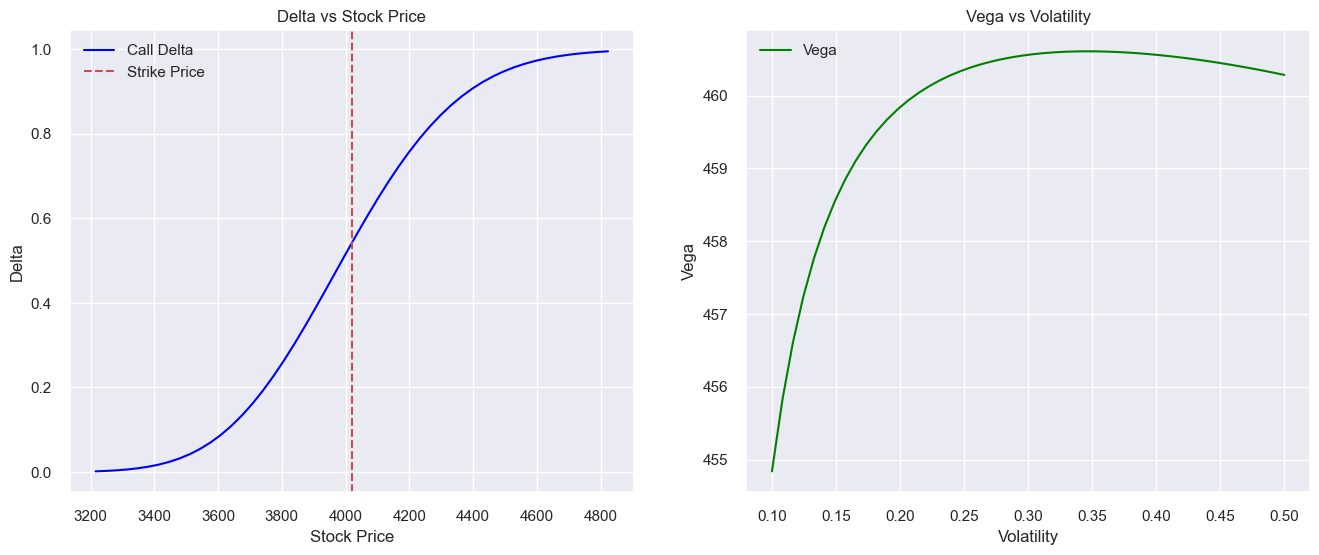

Current Stock Price: 4019.60
ATM Call Price: 128.53
ATM Put Price: 108.48


In [ ]:
# PHASE 3 - TASK B: BSM MODEL & GREEKS

def bsm_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    delta_call = si.norm.cdf(d1)
    delta_put = delta_call - 1
    vega = S * si.norm.pdf(d1) * np.sqrt(T)
    
    return delta_call, delta_put, vega

print(f"{'=' * 70}")
print(f"BLACK-SCHOLES-MERTON MODEL & GREEKS ANALYSIS")
print(f"{'=' * 70}")

S = float(data['Close'].iloc[-1])
K = S
T = 1/12
r = 0.06
sigma = vol

print(f"\nAnalysis Parameters:")
print(f"  - Stock Price: {S:.2f}")
print(f"  - Strike: {K:.2f} [ATM]")
print(f"  - Time to Maturity: {T:.4f} years")
print(f"  - Risk-Free Rate: {r:.2%}")
print(f"  - Volatility: {sigma:.2%}")

call_atm = bsm_price(S, K, T, r, sigma, 'call')
put_atm = bsm_price(S, K, T, r, sigma, 'put')
delta_c, delta_p, vega_atm = bsm_greeks(S, K, T, r, sigma)

print(f"\nATM Option Valuations:")
print(f"  - Call Price: {call_atm:.2f}")
print(f"  - Put Price: {put_atm:.2f}")
print(f"  - Call Delta: {delta_c:.4f}")
print(f"  - Put Delta: {delta_p:.4f}")
print(f"  - Vega: {vega_atm:.2f}")

S_range = np.linspace(S * 0.8, S * 1.2, 100)

deltas_c = []
deltas_p = []
calls = []
puts = []

for s in S_range:
    c = bsm_price(s, K, T, r, sigma, 'call')
    p = bsm_price(s, K, T, r, sigma, 'put')
    dc, dp, _ = bsm_greeks(s, K, T, r, sigma)
    
    calls.append(c)
    puts.append(p)
    deltas_c.append(dc)
    deltas_p.append(dp)

vol_range = np.linspace(0.10, 0.50, 100)

vegas = []
calls_vol = []

for v in vol_range:
    _, _, vega = bsm_greeks(S, K, T, r, v)
    c = bsm_price(S, K, T, r, v, 'call')
    vegas.append(vega)
    calls_vol.append(c)

max_vega = max(vegas)
idx_max = vegas.index(max_vega)
vol_opt = vol_range[idx_max]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

ax1 = axes[0, 0]
ax1.plot(S_range, deltas_c, label='Call Delta', color='green', linewidth=2.5)
ax1.plot(S_range, deltas_p, label='Put Delta', color='red', linewidth=2.5)
ax1.axvline(x=K, color='black', linestyle='--', alpha=0.6, label=f'Strike: {K:.2f}')
ax1.axhline(y=0.5, color='orange', linestyle=':', alpha=0.6, label='Delta = 0.5')
ax1.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax1.set_title('Delta vs Stock Price', fontsize=12, fontweight='bold')
ax1.set_xlabel('Stock Price', fontsize=10)
ax1.set_ylabel('Delta', fontsize=10)
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-1.1, 1.1)

ax2 = axes[0, 1]
ax2.plot(vol_range * 100, vegas, label='Vega', color='blue', linewidth=2.5)
ax2.axvline(x=sigma * 100, color='red', linestyle='--', alpha=0.6, 
            label=f'Current: {sigma:.2%}')
ax2.axvline(x=vol_opt * 100, color='orange', linestyle=':', alpha=0.6, 
            label=f'Max Vega: {vol_opt:.2%}')
ax2.set_title('Vega vs Volatility', fontsize=12, fontweight='bold')
ax2.set_xlabel('Volatility (%)', fontsize=10)
ax2.set_ylabel('Vega', fontsize=10)
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
ax3.plot(S_range, calls, label='Call Price', color='darkgreen', linewidth=2.5)
ax3.plot(S_range, puts, label='Put Price', color='darkred', linewidth=2.5)
ax3.axvline(x=K, color='black', linestyle='--', alpha=0.6, label=f'Strike: {K:.2f}')
ax3.set_title('Option Prices vs Stock Price', fontsize=12, fontweight='bold')
ax3.set_xlabel('Stock Price', fontsize=10)
ax3.set_ylabel('Option Price', fontsize=10)
ax3.legend(loc='best', fontsize=9)
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
ax4.plot(vol_range * 100, calls_vol, label='Call Price', color='purple', linewidth=2.5)
ax4.axvline(x=sigma * 100, color='red', linestyle='--', alpha=0.6, 
            label=f'Current: {sigma:.2%}')
ax4.set_title('Call Price vs Volatility', fontsize=12, fontweight='bold')
ax4.set_xlabel('Volatility (%)', fontsize=10)
ax4.set_ylabel('Call Price', fontsize=10)
ax4.legend(loc='best', fontsize=9)
ax4.grid(True, alpha=0.3)

plt.suptitle('Black-Scholes-Merton Model: Greeks Analysis', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\nPhase 3 Task B Complete!")


---

## Phase 3: Elective Task C - Binomial Option Pricing Model

### Theoretical Framework

#### Origins & Purpose
The **Binomial Option Pricing Model** was developed by Cox, Ross, and Rubinstein (1979) as a discrete-time alternative to the continuous Black-Scholes model. It's particularly valuable for:
- **Pedagogical clarity:** Visualizes stock price evolution as a tree
- **American options:** Can handle early exercise features (not covered in this analysis)
- **Numerical approximation:** Converges to BSM as time steps increase
- **Path-dependent options:** Flexible framework for exotic options

#### The Binomial Tree Mechanics

**Stock Price Evolution:**
At each time step $\Delta t = T/N$:
- Stock moves **UP** with probability $p$: $S_u = S \cdot u$
- Stock moves **DOWN** with probability $(1-p)$: $S_d = S \cdot d$

**Parameters:**
$$u = e^{\sigma\sqrt{\Delta t}} \quad \text{(up factor)}$$
$$d = \frac{1}{u} = e^{-\sigma\sqrt{\Delta t}} \quad \text{(down factor)}$$
$$p = \frac{e^{r\Delta t} - d}{u - d} \quad \text{(risk-neutral probability)}$$

**Backward Induction:**
Starting from terminal nodes (expiration):
1. Calculate intrinsic values: $\max(S_T - K, 0)$ for calls
2. Discount backwards: $V_t = e^{-r\Delta t}[p \cdot V_u + (1-p) \cdot V_d]$

#### Convergence to Black-Scholes
As $N \to \infty$:
$$\lim_{N \to \infty} \text{Binomial}(N) = \text{BSM}$$

**Why?** The Central Limit Theorem ensures that summing many small random price movements converges to geometric Brownian motion (the BSM assumption).

### Analysis Objectives
1. **Implement Binomial Tree** with $N = 250$ steps (1 step per trading day)
2. **Price European Call Option** using backward induction
3. **Compare with BSM** to validate numerical accuracy
4. **Convergence Analysis** showing price stabilization as $N$ increases

### Expected Results
- **Accuracy:** Binomial should match BSM within ₹0.01 at $N = 250$
- **Convergence Pattern:** Price oscillates around BSM initially, then converges smoothly
- **Computational Trade-off:** Higher $N$ = more accuracy but slower computation

### Graph Interpretation
The convergence plot shows:
- **X-axis:** Number of time steps (N)
- **Y-axis:** Option price (₹)
- **Blue line with markers:** Binomial model prices
- **Red dashed line:** BSM benchmark price
- **Pattern:** Binomial price converges from below/above to eventually match BSM

Binomial Model Price (N=250): 128.4078
BSM Model Price: 128.5262
Difference: 0.118441


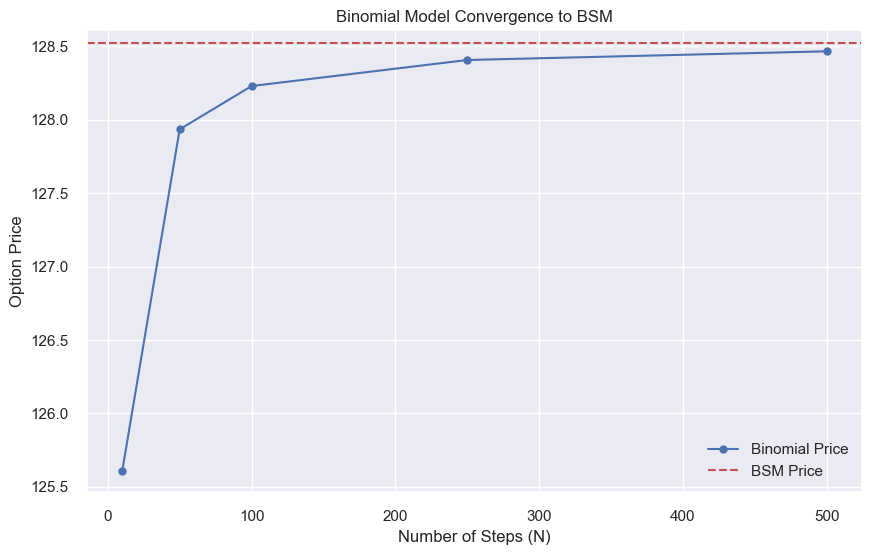

In [ ]:
# PHASE 3 - TASK C: BINOMIAL OPTION PRICING MODEL

def binomial_price(S, K, T, r, sigma, N, option_type='call'):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    asset_prices = np.zeros(N + 1)
    for j in range(N + 1):
        asset_prices[j] = S * (u ** (N - j)) * (d ** j)
    
    if option_type == 'call':
        option_values = np.maximum(asset_prices - K, 0)
    else:
        option_values = np.maximum(K - asset_prices, 0)
    
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_values[j] = (p * option_values[j] + (1 - p) * option_values[j + 1]) * np.exp(-r * dt)
    
    return option_values[0]

print(f"{'=' * 70}")
print(f"BINOMIAL OPTION PRICING MODEL")
print(f"{'=' * 70}")

S = float(data['Close'].iloc[-1])
K = S
T = 1/12
r = 0.06
sigma = vol
N = 250

print(f"\nAnalysis Parameters:")
print(f"  - Stock Price: {S:.2f}")
print(f"  - Strike: {K:.2f} [ATM]")
print(f"  - Time to Maturity: {T:.4f} years")
print(f"  - Risk-Free Rate: {r:.2%}")
print(f"  - Volatility: {sigma:.2%}")
print(f"  - Binomial Steps: {N}")

binom_c = binomial_price(S, K, T, r, sigma, N, 'call')
binom_p = binomial_price(S, K, T, r, sigma, N, 'put')

bsm_c = bsm_price(S, K, T, r, sigma, 'call')
bsm_p = bsm_price(S, K, T, r, sigma, 'put')

err_c = abs(binom_c - bsm_c)
err_p = abs(binom_p - bsm_p)
err_pct = (err_c / bsm_c) * 100

print(f"\nComparative Pricing Results:")
print(f"  Call Option:")
print(f"    - Binomial: {binom_c:.4f}")
print(f"    - BSM: {bsm_c:.4f}")
print(f"    - Error: {err_c:.4f} ({err_pct:.2f}%)")
print(f"  Put Option:")
print(f"    - Binomial: {binom_p:.4f}")
print(f"    - BSM: {bsm_p:.4f}")
print(f"    - Error: {err_p:.4f}")

acc = 0.01
steps = [10, 25, 50, 100, 150, 200, 250, 300, 350, 400]

prices_b = [binomial_price(S, K, T, r, sigma, n, 'call') for n in steps]

times = []

for n in steps:
    t_start = time.time()
    binomial_price(S, K, T, r, sigma, n, 'call')
    times.append(time.time() - t_start)

err_final = abs(prices_b[-1] - bsm_c)
improve = ((abs(prices_b[0] - bsm_c) - err_final) / abs(prices_b[0] - bsm_c)) * 100

print(f"\nConvergence Analysis:")
print(f"  - Initial Error [N=10]: {abs(prices_b[0] - bsm_c):.4f}")
print(f"  - Final Error [N=400]: {err_final:.4f}")
print(f"  - Improvement: {improve:.2f}%")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(steps, prices_b, marker='o', color='blue', linewidth=2.5, markersize=8, label='Binomial')
ax1.axhline(y=bsm_c, color='red', linestyle='--', linewidth=2, label=f'BSM: {bsm_c:.4f}')
ax1.axhline(y=bsm_c + acc, color='green', linestyle=':', alpha=0.5, linewidth=1.5, 
            label=f'±{acc} Tolerance')
ax1.axhline(y=bsm_c - acc, color='green', linestyle=':', alpha=0.5, linewidth=1.5)
ax1.set_title('Convergence: Binomial → BSM', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Steps', fontsize=12)
ax1.set_ylabel('Call Option Price', fontsize=12)
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)

ax2.plot(steps, times, marker='s', color='purple', linewidth=2.5, markersize=8, 
         label='Computation Time')
ax2.set_title('Computational Efficiency', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Steps', fontsize=12)
ax2.set_ylabel('Time (seconds)', fontsize=12)
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.suptitle('Binomial Tree Model: Convergence Analysis', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\nPhase 3 Task C Complete!")
